## **PRELIMNARY CHECKS**

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Checking the shape of the given dataset**

In [ ]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Label shape (train):", y_train.shape)
print("Label shape (test):", y_test.shape)
print("Pixel value range:", x_train.min(), "to", x_train.max())


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Label shape (train): (60000,)
Label shape (test): (10000,)
Pixel value range: 0 to 255


**Displaying random digits wiht labels**

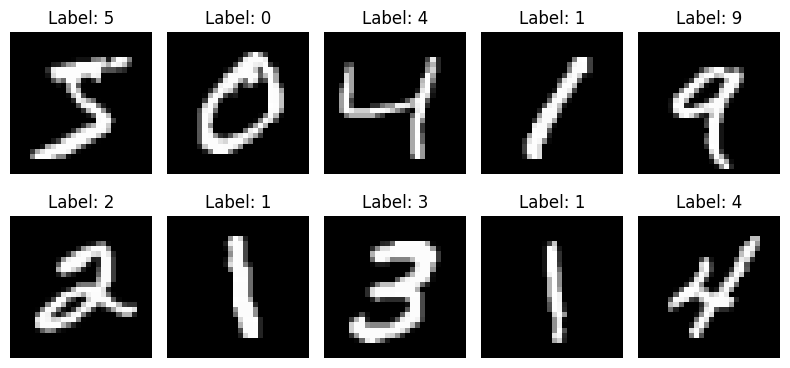

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Checking the distrubution of the data**

In [ ]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Digit {u}: {c} samples")

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


## **DATA PREPROCESSING**
**chanaging the pixel values from(0,255) to (0,1) so that its easier for ml model to process**

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("After normalization:")
print("Train data range:", x_train.min(), "to", x_train.max())
print("Test data range:", x_test.min(), "to", x_test.max())

After normalization:
Train data range: 0.0 to 1.0
Test data range: 0.0 to 1.0


**Reshaping the images to 28x28 so that its easier for classical ml models to process
and for CNN's doing the same but adding channel dimension**

In [ ]:
#classical ml models
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
print("Flattened shape for ML models:", x_train_flat.shape)

# For CNNs
x_train_cnn = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_cnn = x_test.reshape((x_test.shape[0], 28, 28, 1))
print("Shape for CNN models:", x_train_cnn.shape)

Flattened shape for ML models: (60000, 784)
Shape for CNN models: (60000, 28, 28, 1)


**using one hot encoding to label the images**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Example: Label 3 →", y_train_cat[3])


Example: Label 3 → [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## **CLASSIC ML MODELS**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**MANUAL TESTING**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/Screenshot from 2025-10-11 00-26-25.png", cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))

img_inverted = 255 - img_resized

img_norm = img_inverted / 255.0

img_flat = img_norm.reshape(1, -1)

plt.imshow(img_inverted, cmap='gray')
plt.title("Processed Input Image")
plt.axis('off')
plt.show()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


**Logistic regression**

In [ ]:
log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    multi_class='multinomial'
)

log_reg.fit(x_train_flat, y_train)
y_pred_lr = log_reg.predict(x_test_flat)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", round(acc_lr * 100, 2), "%")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 92.64 %


In [ ]:
pred = log_reg.predict(img_flat)
print("Predicted Digit:", int(pred[0]))

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", round(acc_knn * 100, 2), "%")


In [ ]:
pred = knn.predict(img_flat)
print("Predicted Digit:", int(pred[0]))

**SVM**

In [ ]:
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(x_train_flat[:10000], y_train[:10000])  # training on subset for speed
y_pred_svm = svm.predict(x_test_flat)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", round(acc_svm * 100, 2), "%")


In [ ]:
pred = svm.predict(img_flat)
print("Predicted Digit:", int(pred[0]))